In [ ]:
# Reference:

sumofx = 386
sumofy = 460
sumofx2 = 25426
sumofy2 = 28867
sumofxy = 26161
n = 8

Sxx = sumofx2 - (sumofx)**2/n
Syy = sumofy2 - (sumofy)**2/n
Sxy = sumofxy - (sumofx*sumofy)/n


total_sum_of_square = Syy
regression_sum_of_square = beta1*Sxy
residual_sum_of_square = Syy - beta1*Sxy


beta_0 = mean_y - beta1*mean_x
beta_1 = Sxy/Sxx



# Exercise 1

In [20]:

n = 20

sumofx = 809
sumofy = 68.3

Sxx = 3630.95
Sxy = 201.665
Syy = 12.9455

mean_x = sumofx/n
mean_y = sumofy/n

beta_1 = Sxy/Sxx
beta_0 = mean_y - beta_1*mean_x

print("y-intercept is : ",beta_0)
print("Slope is: ", beta_1)


total_sum_of_square = Syy
regression_sum_of_square = beta_1*Sxy
residual_sum_of_square = Syy - beta_1*Sxy

print("Total Sum of Square: ", total_sum_of_square)
print("Regression Sum of Square: ", regression_sum_of_square)
print("Residual Sum of Square: ", residual_sum_of_square)


print("Mean Square of Regression : ", regression_sum_of_square/1)
print("Mean Square of Residual : ", residual_sum_of_square/(n-1-1))

print("F Value is: ", (regression_sum_of_square/1)/(residual_sum_of_square/(n-1-1)))


# for F distribution

from scipy.stats import distributions as dists

fcritical = dists.f.ppf(1-0.001,1,18)  # F statistics with DF regression = 1, Residual =18
print("The critical value for 0.1% significant level is: ",fcritical)


# Notice that 115.54191958698756 > 15.3793059774, we reject the null hypothesis in favor of alternative hypothesis
# null hypothesis is beta_1 = 0, alternative hypothesis is beta_1 <> 0

y-intercept is :  1.1683843071372504
Slope is:  0.055540561010203944
Total Sum of Square:  12.9455
Regression Sum of Square:  11.200587236122779
Residual Sum of Square:  1.7449127638772204
Mean Square of Regression :  11.200587236122779
Mean Square of Residual :  0.09693959799317892
F Value is:  115.54191958698756
The critical value for 1% significant level is:  15.3793059774


# Exercise 2

In [26]:

t = [50,50, 60,60, 70,70, 80,80, 90,90, 100,100]
h = [ 1.64, 1.6,1.63, 1.65, 1.67, 1.67, 1.72,1.70 , 1.72, 1.71, 1.74, 1.71]

import pandas as pd
df = pd.DataFrame( {'t': t, 'h': h})

df

,h,t
0,1.64,50
1,1.60,50
2,1.63,60
3,1.65,60
4,1.67,70
5,1.67,70
6,1.72,80
7,1.70,80
8,1.72,90
9,1.71,90


Text(0,0.5,'h')

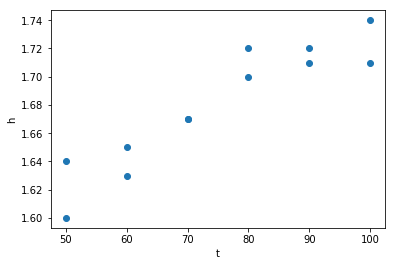

In [28]:
import matplotlib.pyplot as plt

plt.plot(t,h,"o")
plt.xlabel("t")
plt.ylabel("h")

# The data follow a broadly linear increasing trend with roughly constant scatter. 
# It is reasonable to assume that the temperature is preset by the experimenters without error. 


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'t':t,
     'h':h})

# y~x meaning that the target variable is y, the predictor is x

result = smf.ols('h~t',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     64.41
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           1.15e-05
Time:                        09:33:10   Log-Likelihood:                 33.219
No. Observations:                  12   AIC:                            -62.44
Df Residuals:                      10   BIC:                            -61.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5107      0.022     69.831      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [31]:
new_record = [85]

new_record = pd.DataFrame(
    {'t':new_record
    })


res = result.predict(new_record)

print("The predicted Heat for temperature equal to 85 is", res)

The predicted Heat for temperature equal to 85 is 0    1.702571
dtype: float64


# Exercise 3:

In [32]:
# Exercise 3:

price = [14, 20, 37, 36, 31, 42, 54, 64, 38, 66, 64, 77, 79, 93, 119, 135]
length = [120, 120, 120, 120, 150, 150, 150, 150, 180, 180, 180, 180, 240, 240, 240, 240]
width = [60, 80, 100, 120, 75, 100, 125, 150, 90, 120, 150, 180, 120, 160, 200, 240]

In [33]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import pandas as pd

# using dataframe as the basis for statistical modeling

df = pd.DataFrame(
    {'price':price,
     'length':length,
    'width':width })

# price~length+width meaning that the target variable is price, the predictor are length and width

result = smf.ols('price~length+width',data = df).fit()

# print the summary can get thoughout understanding of the fitted linear regression

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     300.4
Date:                Tue, 27 Mar 2018   Prob (F-statistic):           1.31e-11
Time:                        09:39:24   Log-Likelihood:                -47.804
No. Observations:                  16   AIC:                             101.6
Df Residuals:                      13   BIC:                             103.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -52.6714      5.345     -9.854      0.0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [1]:
# for F distribution

from scipy.stats import distributions as dists

fcritical = dists.f.ppf(1-0.001,2,13)  # F statistics with DF regression = 2, Residual =13
print("The critical value for 0.1% significant level is: ",fcritical)

The critical value for 0.1% significant level is:  12.3127298107


## Notice that the F Statistics is 300.4 > 12.3127, we reject the null hypothesis (beta_0 = beta_1=beta_2=0) in favor of alternative hypothesis, taking 0.1% significant level

## The p-values for length and width are all smaller than 0.1%, we reject the null hypothesis(beta_1=0, beta_2=0) in favor of alternative hypothesis (beta_1 <>0,beta_2 <>0) 

## The R-squared = 0.98 which means 98% of Y is explained by the model

## In summary, the fitted multiple linear model is useful for making prediction on price based on length and width